In [110]:
import math
import cv2 
import numpy             as np
import matplotlib.pyplot as plt
from   math import sqrt
from   math import pi
from   math import erf
from  scipy import stats
from  scipy import fftpack
from  scipy import fft
from    PIL import Image, ImageFilter
from matplotlib.colors import LogNorm
%matplotlib inline

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

The probability that in a single year are observed 15 or more hurricanes is: 
0.0013726297097147906

Z = 3.4661629670697414 > 3 
p-value = 0.0005279431738299246
Therefore the p-value is smaller than 5% and so, 
15 is a statistically significant number of hurricanes per year.


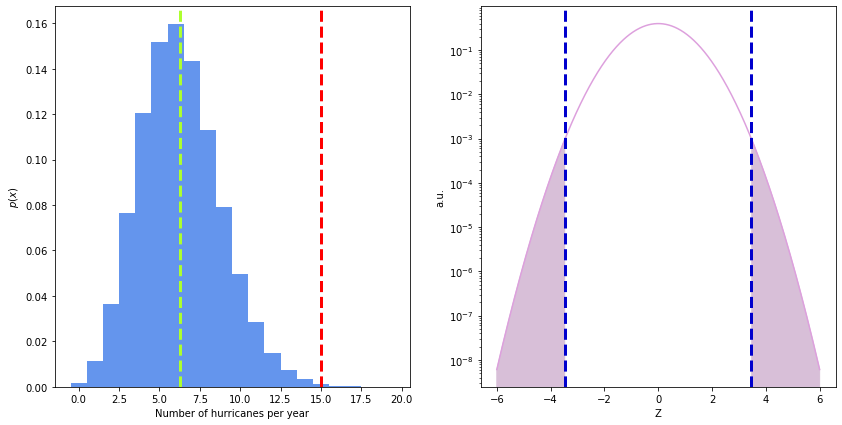

In [111]:
# plot the measurement and its assumed pdf and the test statistics and its pdf
fig, ( plt_1, plt_2 ) = plt.subplots( nrows = 1, 
                                      ncols = 2, 
                                      figsize = (14, 7) )
x0    = 15.
mu    = 6.3
sigma = math.sqrt( mu ) # Poisson distribution

w = mu - x0
x = np.arange( 20 )
y = stats.poisson.pmf( x, mu )
plt_1.bar( x, 
           y, 
           width = 1, 
           color = 'cornflowerblue' )

plt_1.axvline( x0, 
               linestyle = '--', 
               color     = 'red',
               linewidth = 3)
plt_1.axvline( mu, 
               linestyle = '--', 
               color     = 'greenyellow',
               linewidth = 3)
plt_1.set_ylabel( '$p(x)$' )
plt_1.set_xlabel( 'Number of hurricanes per year' )

Z = abs( x0 - mu)  / sigma

print( 'The probability that in a single year are observed 15 or more hurricanes is: ' )
print( y[15] )

xs = np.linspace( -6, +6, 1000 )
ts = stats.norm.pdf( xs )
plt_2.plot( xs, ts, color = 'plum'  )
plt_2.fill_between( xs, 
                    ts, 
                    where = np.abs( xs ) > np.abs( Z ),
                    color = 'thistle' )
plt_2.axvline( Z, 
               linestyle = '--', 
               color     = 'mediumblue',
               linewidth = 3)
plt_2.axvline( -Z, 
               linestyle = '--', 
               color     = 'mediumblue',
               linewidth = 3)
plt_2.set_ylabel( "a.u." )
plt_2.set_xlabel( "Z" )
plt_2.set_yscale( "log" )

Z = abs( x0 - mu ) / sigma
print( '\nZ =', Z, '> 3 ')

pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))

print("p-value =", pvalue)
print("Therefore the p-value is smaller than 5% and so,", 
      "\n15 is a statistically significant number of hurricanes per year.")

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T = -3.786997938137629
p-value = 0.004302464132864604
The p-value is smaller than 0.05 / 2 
So the change in blood pressures within our sample was statistically significant.


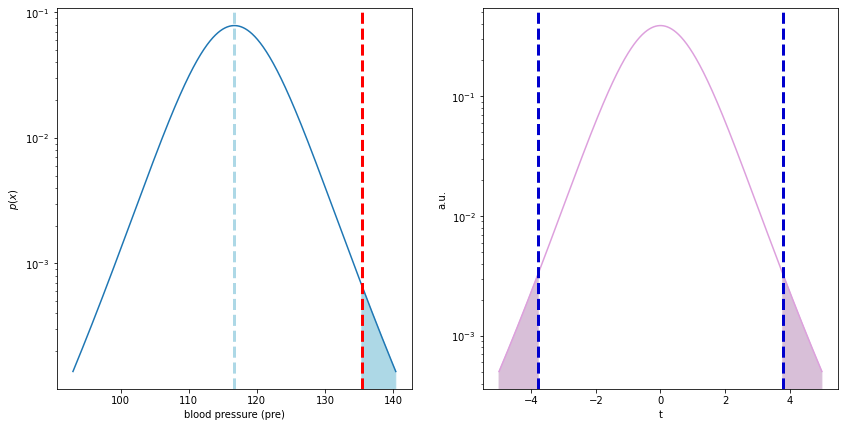

In [112]:
pre  = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

var_pre  =  np.var( pre,  
                    ddof =  1 ) # ddof = numero di vicoli, di default = 0, ma con t-student -1
var_post =  np.var( post, 
                    ddof =  1 )
sigma    = math.sqrt( var_pre + var_post ) # sigma * sqrt( 2 )

mean_pre   = np.mean( pre  ) 
mean_post  = np.mean( post ) 
w          = mean_pre - mean_post

n  = len( pre ) 

T = w / ( sigma / np.sqrt( n ))

print( "T =", T )

# plot 
fig, ( plt_1, plt_2 ) = plt.subplots( nrows   = 1, 
                                      ncols   = 2, 
                                      figsize = (14, 7) )
x = np.linspace( mean_pre - np.abs(w) - 5, np.abs(w)  + mean_pre + 5, 1000 )
y = stats.t.pdf( x, 
                 loc   = mean_pre, 
                 scale = sigma / np.sqrt( n ),  
                 df    = n - 1 )
plt_1.plot(x, y)
plt_1.fill_between( x, 
                    y, 
                    where = x - mean_pre > np.abs(w), 
                    color = 'lightblue' )
plt_1.axvline( mean_post, 
               linestyle = '--', 
               color     = 'red',
               linewidth = 3 )
plt_1.axvline( mean_pre, 
               linestyle = '--', 
               color     = 'lightblue',
               linewidth = 3 )
plt_1.set_ylabel( "$p(x)$" )
plt_1.set_xlabel( "blood pressure (pre)" )
plt_1.set_yscale( "log" )

# plot the test statistics and its pdf
xs = np.linspace( -5, +5, 1000 )
ts = stats.t.pdf( xs, 
                  n - 1)
plt_2.plot(xs, ts, color = 'plum' )
plt_2.fill_between( xs, 
                    ts, 
                    where = np.abs( xs ) > np.abs(T), 
                    color = 'thistle' )
plt_2.axvline( T, 
               linestyle = '--', 
               color     = 'mediumblue',
               linewidth = 3)
plt_2.axvline( -T, 
               linestyle = '--', 
               color     = 'mediumblue',
               linewidth = 3)
plt_2.set_ylabel( "a.u." )
plt_2.set_xlabel( "t"    )
plt_2.set_yscale( "log"  )



# now we calculate the p-value. Since it's double sided:
pvalue = stats.t.cdf( T, n - 1 ) + ( 1. - stats.t.cdf( -T, n - 1 ))
print( "p-value =", pvalue )
print("The p-value is smaller than 0.05 / 2 \nSo the change in blood pressures within our sample was statistically significant.")

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

Peak frequencies for hares and linxes:  0.09523809523809523 , 0.09523809523809523
Period for hares and linxes (in years): 10.5 ,                 10.5


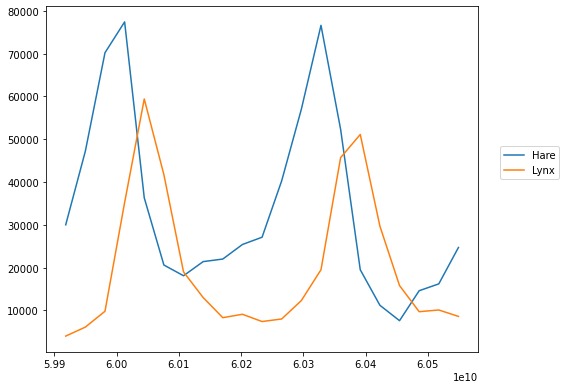

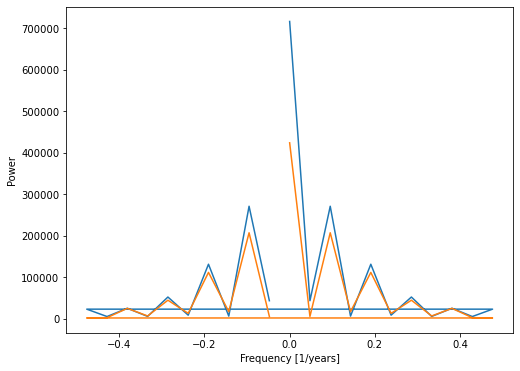

In [113]:
data = np.loadtxt( 'populations.txt' )
year, hares, lynxes, carrots = data.T 
plt.figure( figsize = ( 12, 6 ))
plt.axes([ 0.2, 0.1, 0.5, 0.8 ]) 
plt.plot( sec, hares, sec, lynxes )  
plt.legend(( 'Hare', 'Lynx' ), loc = (1.05, 0.5)) 

# The FFT of the signal
sig_fft_h = fftpack.fft( hares  )
sig_fft_l = fftpack.fft( lynxes )

power_h = np.abs( sig_fft_h )
power_l = np.abs( sig_fft_l )

sample_freq_h = fftpack.fftfreq( hares.size,  d = 1 ) 
sample_freq_l = fftpack.fftfreq( lynxes.size, d = 1 )

# Plot the FFT power
plt.figure( figsize = (8, 6))
plt.plot( sample_freq_h, power_h, 
          sample_freq_l, power_l )
plt.xlabel( 'Frequency [1/years]' )
plt.ylabel( 'Power' )

# Find the peak frequency: focus only on only the positive frequencies
pos_mask_h = np.where( sample_freq_h > 0 )
pos_mask_l = np.where( sample_freq_l > 0 )
freqs_h    = sample_freq_h[pos_mask_h]
freqs_l    = sample_freq_l[pos_mask_l]
powes_h    = power_h[pos_mask_h]
powes_l    = power_l[pos_mask_l]

# find the max of freqs array
peak_freq_h = freqs_h[powes_h.argmax()]
peak_freq_l = freqs_l[powes_l.argmax()]

print( 'Peak frequencies for hares and linxes: ', peak_freq_h,',', peak_freq_l )
print( 'Period for hares and linxes (in years):', 1/peak_freq_h, ',                ', 1/peak_freq_l )

high_freq_fft_h[np.abs( sample_freq_h ) > peak_freq_h] = 0
high_freq_fft_l[np.abs( sample_freq_l ) > peak_freq_l] = 0

filtered_sig_h = fftpack.ifft( high_freq_fft_h )
filtered_sig_l = fftpack.ifft( high_freq_fft_l )
real_filtered_signal_h = np.real( filtered_sig_h )
real_filtered_signal_l = np.real( filtered_sig_l )


4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

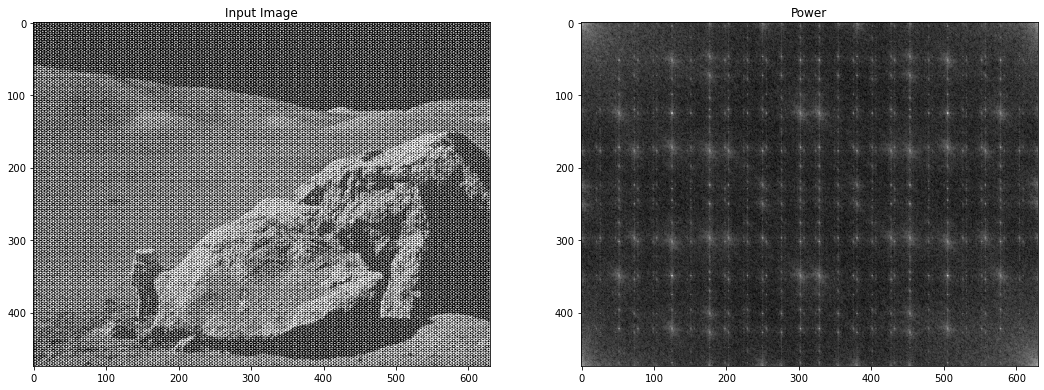

In [175]:
image     = plt.imread( 'moonlanding.png' ) # reads the image
image_fft = fftpack.fft2( image )
power     = np.abs( image_fft )

plt.figure( figsize = (18,10))
plt.subplot( 121 )
plt.imshow( image, cmap = 'gray')
plt.title( 'Input Image' )

plt.subplot( 122 )
plt.imshow( power, cmap = 'gray', norm = LogNorm( vmin = 5) )
plt.title( 'Power' )
plt.show( )


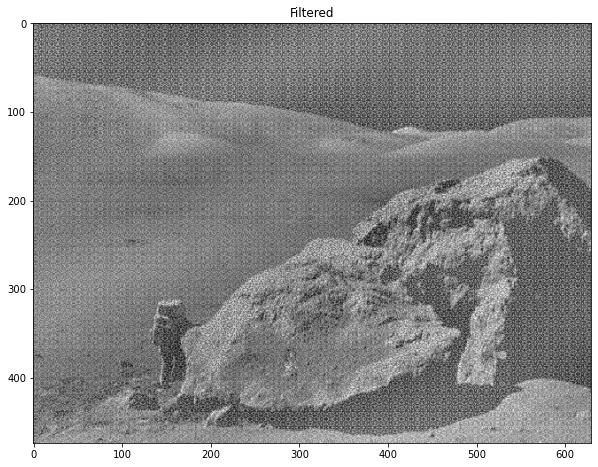

In [178]:
plt.figure( figsize = (10,9))
image_fft[np.abs(image_fft) > 4000] = 0
image_flt = fftpack.ifft2(image_fft).real
plt.imshow( image_flt, cmap='gray' )
plt.title( 'Filtered' )
plt.show()
